## Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Titanic (1).csv")
data

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [3]:
data.head(5)

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


## Summarize Dataset

In [4]:
data.shape

(2201, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [6]:
data.isna().sum()

Class       0
Gender      0
Age         0
Survived    0
dtype: int64

In [7]:
data.isnull().sum()

Class       0
Gender      0
Age         0
Survived    0
dtype: int64

In [8]:
data.dtypes

Class       object
Gender      object
Age         object
Survived    object
dtype: object

## Mapping Text Data to Binary value

In [9]:
income_set = set(data[['Gender','Survived']])
data['Gender']=data['Gender'].map({'Female':0, 'Male':1}).astype(int)
data['Survived']=data['Survived'].map({'No':0, 'Yes':1}).astype(int)
print(data.head)

<bound method NDFrame.head of      Class  Gender    Age  Survived
0      3rd       1  Child         0
1      3rd       1  Child         0
2      3rd       1  Child         0
3      3rd       1  Child         0
4      3rd       1  Child         0
...    ...     ...    ...       ...
2196  Crew       0  Adult         1
2197  Crew       0  Adult         1
2198  Crew       0  Adult         1
2199  Crew       0  Adult         1
2200  Crew       0  Adult         1

[2201 rows x 4 columns]>


## Using Label Encoder For Pclass and Age Column

In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the 'Pclass' feature
data['Class'] = le.fit_transform(data['Class'])

# Encode the 'Age' feature
data['Age'] = le.fit_transform(data['Age'])

# View the encoded dataset
print(data.head())

   Class  Gender  Age  Survived
0      2       1    1         0
1      2       1    1         0
2      2       1    1         0
3      2       1    1         0
4      2       1    1         0


## Segregate dataset into X (Independent Variable) & Y (Dependent Variable)

In [11]:
X = data.drop('Survived',axis='columns')
X

,Class,Gender,Age
0,2,1,1
1,2,1,1
2,2,1,1
3,2,1,1
4,2,1,1
...,...,...,...
2196,3,0,0
2197,3,0,0
2198,3,0,0
2199,3,0,0


In [12]:
Y = data.Survived
Y

0       0
1       0
2       0
3       0
4       0
       ..
2196    1
2197    1
2198    1
2199    1
2200    1
Name: Survived, Length: 2201, dtype: int32

## Splitting Dataset Into Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

## Training

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

## Predicting for Test data

In [15]:
y_pred = model.predict(X_test)
print(np.column_stack((y_pred,y_test)))

[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Accuracy For Our Model 

In [16]:
from sklearn.metrics import classification_report,accuracy_score
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       381
           1       0.68      0.54      0.60       170

    accuracy                           0.78       551
   macro avg       0.75      0.71      0.72       551
weighted avg       0.77      0.78      0.77       551



<Axes: >

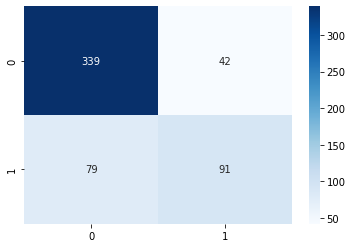

In [17]:
from sklearn.metrics import confusion_matrix
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [18]:
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the Model: 78.0399274047187%


## Visualization

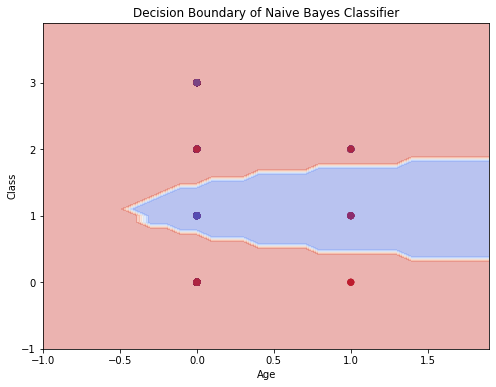

In [19]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Age'], X_train['Class'], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Class')
plt.title('Decision Boundary of Naive Bayes Classifier')
x_min, x_max = X_train['Age'].min() - 1, X_train['Age'].max() + 1
y_min, y_max = X_train['Class'].min() - 1, X_train['Class'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(len(xx.ravel()))])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.show()